# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Mimo: Learn to Code** di Google Play Store. 

## 🔧 **Libraries Used**

In [2]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.getmimo')  # ID aplikasi Mimo
print("Versi terbaru:", info['version'])

Versi terbaru: 6.4


In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.getmimo',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bf97b8f6-1d4f-4d1a-977d-67f26feebe7d,musthafa tt,https://play-lh.googleusercontent.com/a-/ALV-U...,always good,4,0,None,2025-06-17 19:11:16,None,NaT,None
1,8dc6353c-11ff-4aae-81f3-8fbf5553ca5a,David “Me109” O,https://play-lh.googleusercontent.com/a/ACg8oc...,Good app. Input management is not perfect sinc...,3,1,6.3,2025-06-17 18:35:56,None,NaT,6.3
2,583b2d67-2c48-40d3-821a-306ac5392dab,Reotshepile Sekgobela,https://play-lh.googleusercontent.com/a-/ALV-U...,Not bad,3,0,6.3,2025-06-17 15:56:00,None,NaT,6.3
3,3183ad95-7da6-47c1-8dcd-5e2c44d59afb,YAHIKO,https://play-lh.googleusercontent.com/a-/ALV-U...,"This app is amazing, it really helps",5,0,6.3,2025-06-17 15:10:55,None,NaT,6.3
4,36bb38eb-b399-4662-97a5-b19384284cfb,Chetan K. Babu,https://play-lh.googleusercontent.com/a-/ALV-U...,gud,5,0,6.3,2025-06-17 14:34:28,None,NaT,6.3
...,...,...,...,...,...,...,...,...,...,...,...
995,43ef68ec-7c0f-4d85-a7c8-7677f9c6d1fe,Thembekile Motsepe,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app for beginners to learn fast🤑,5,0,6.3,2025-05-09 02:39:03,None,NaT,6.3
996,5bbc8d95-2b33-42ea-aa63-b54cb36fc278,Uche Daniel,https://play-lh.googleusercontent.com/a/ACg8oc...,cool yo,5,0,6.3,2025-05-09 02:32:21,None,NaT,6.3
997,30de9934-f0ee-4df9-8b26-6e686f436f46,Senen Pillay,https://play-lh.googleusercontent.com/a/ACg8oc...,"good for learning,it's like a game so it will ...",5,0,None,2025-05-09 02:25:17,None,NaT,None
998,6bb71dfc-70c9-4d85-8bd0-bb792a794f2e,Kallappa Hosamani,https://play-lh.googleusercontent.com/a-/ALV-U...,good 👍,5,0,6.3,2025-05-08 23:18:43,None,NaT,6.3


In [5]:
output_path = "../data/review_mimo.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_mimo.xlsx


In [6]:
# # Import data
# file_path = "../data/review_mimo.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,always good,4
1,Good app. Input management is not perfect sinc...,3
2,Not bad,3
3,"This app is amazing, it really helps",5
4,gud,5
...,...,...
995,Best app for beginners to learn fast🤑,5
996,cool yo,5
997,"good for learning,it's like a game so it will ...",5
998,good 👍,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    747
4    161
3     38
1     38
2     16
Name: count, dtype: int64

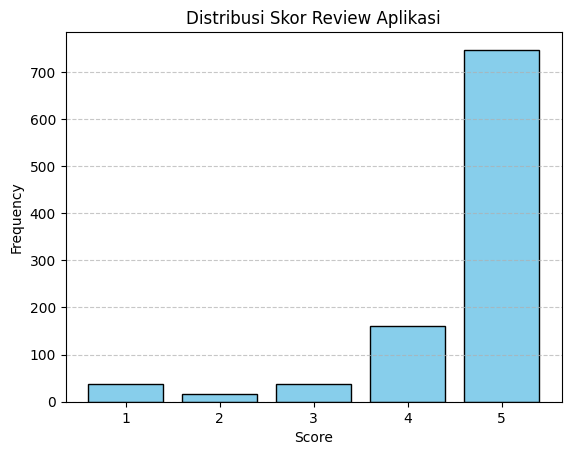

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.563000
std,0.935364
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

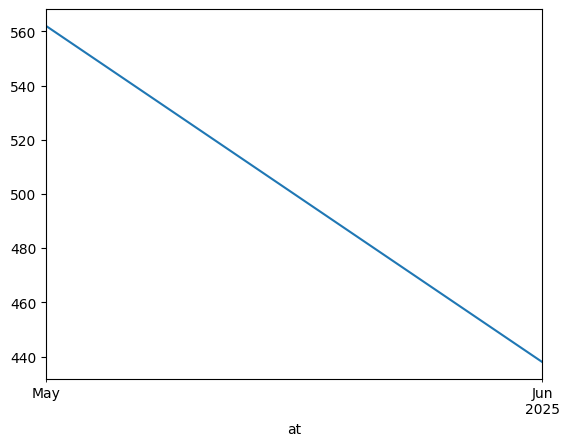

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [3]:
# # Import data
file_path = "../data/review_mimo.xlsx"
df = pd.read_excel(file_path)
df2 = df[['content', 'score']].copy()
df2

,content,score
0,always good,4
1,Good app. Input management is not perfect sinc...,3
2,Not bad,3
3,"This app is amazing, it really helps",5
4,gud,5
...,...,...
995,Best app for beginners to learn fast🤑,5
996,cool yo,5
997,"good for learning,it's like a game so it will ...",5
998,good 👍,5


In [4]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [6]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,always good,4,always good
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...
2,Not bad,3,not bad
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps"
4,gud,5,gud


In [7]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,always good,4,always good
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...
2,Not bad,3,not bad
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps"
4,gud,5,gud


In [8]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,always good,4,always good,"[always, good]"
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...,"[good, app., input, management, is, not, perfe..."
2,Not bad,3,not bad,"[not, bad]"
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps","[this, app, is, amazing, ,, it, really, helps]"
4,gud,5,gud,[gud]


In [9]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [10]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [11]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,always good,4,always good,"[always, good]","[always, good]","[always, good]"
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...,"[good, app., input, management, is, not, perfe...","[good, app., input, management, is, not, perfe...","[good, input, management, perfect, since, poss..."
2,Not bad,3,not bad,"[not, bad]","[not, bad]",[bad]
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps","[this, app, is, amazing, ,, it, really, helps]","[this, app, is, amazing, ,, it, really, helps]","[amazing, really, helps]"
4,gud,5,gud,[gud],[gud],[gud]


In [12]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
20,nice aap,5,nice aap,"[nice, aap]","[nice, aap]","[nice, aap]"
27,nice,5,nice,[nice],[nice],[nice]
39,A very nice app that explains with simple term...,5,a very nice app that explains with simple term...,"[a, very, nice, app, that, explains, with, sim...","[a, very, nice, app, that, explains, with, sim...","[nice, explains, simple, terms, skip, problem,..."
42,nice app,5,nice app,"[nice, app]","[nice, app]",[nice]
64,very nice smooth and fast easier for beginners,5,very nice smooth and fast easier for beginners,"[very, nice, smooth, and, fast, easier, for, b...","[very, nice, smooth, and, fast, easier, for, b...","[nice, smooth, fast, easier, beginners]"
...,...,...,...,...,...,...
920,App is very nice but I would love to see a fea...,4,app is very nice but i would love to see a fea...,"[app, is, very, nice, but, i, would, love, to,...","[app, is, very, nice, but, i, would, love, to,...","[nice, would, love, see, feature, could, pract..."
928,nice app to start coding,5,nice app to start coding,"[nice, app, to, start, coding]","[nice, app, to, start, coding]","[nice, start, coding]"
961,nice,5,nice,[nice],[nice],[nice]
977,I like this app very nice 👌🏻,5,i like this app very nice 👌🏻,"[i, like, this, app, very, nice, 👌🏻]","[i, like, this, app, very, nice, 👌🏻]","[like, nice]"


In [13]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,always good,4,always good,"[always, good]","[always, good]","[always, good]","[always, good]"
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...,"[good, app., input, management, is, not, perfe...","[good, app., input, management, is, not, perfe...","[good, input, management, perfect, since, poss...","[good, input, management, perfect, since, poss..."
2,Not bad,3,not bad,"[not, bad]","[not, bad]",[bad],[bad]
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps","[this, app, is, amazing, ,, it, really, helps]","[this, app, is, amazing, ,, it, really, helps]","[amazing, really, helps]","[amazing, really, help]"
4,gud,5,gud,[gud],[gud],[gud],[gud]


In [14]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,always good,4,always good,"[always, good]","[always, good]","[always, good]","[always, good]","[always, good]"
1,Good app. Input management is not perfect sinc...,3,good app. input management is not perfect sinc...,"[good, app., input, management, is, not, perfe...","[good, app., input, management, is, not, perfe...","[good, input, management, perfect, since, poss...","[good, input, management, perfect, since, poss...","[good, perfect, since, possible, start, answer..."
2,Not bad,3,not bad,"[not, bad]","[not, bad]",[bad],[bad],[bad]
3,"This app is amazing, it really helps",5,"this app is amazing, it really helps","[this, app, is, amazing, ,, it, really, helps]","[this, app, is, amazing, ,, it, really, helps]","[amazing, really, helps]","[amazing, really, help]","[amazing, really, help]"
4,gud,5,gud,[gud],[gud],[gud],[gud],[]


In [15]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 968


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [16]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [17]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

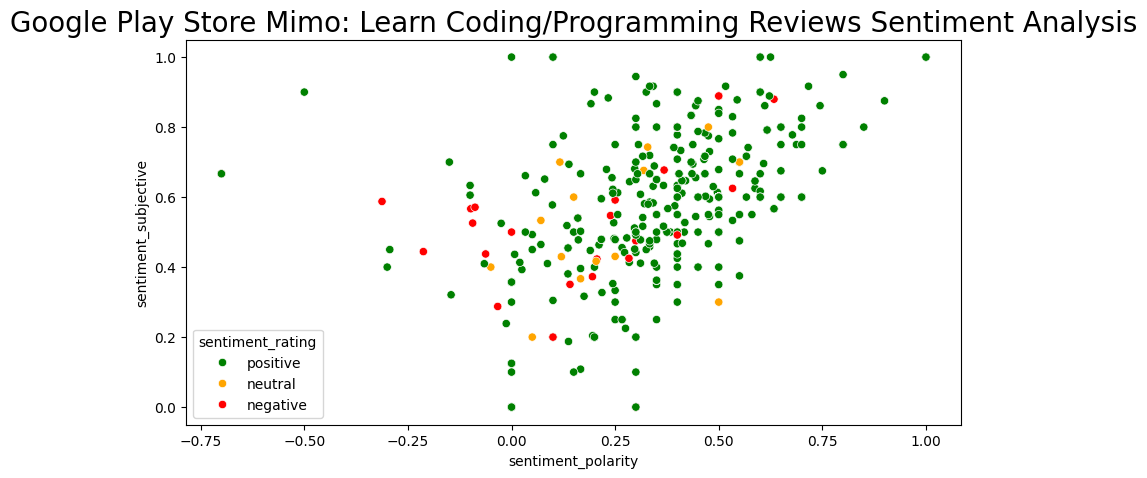

In [18]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Mimo: Learn Coding/Programming Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [19]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 877 review
- neutral : 37 review
- negative: 54 review


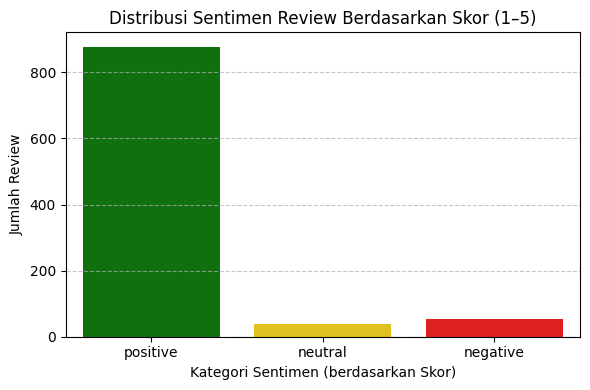

In [20]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

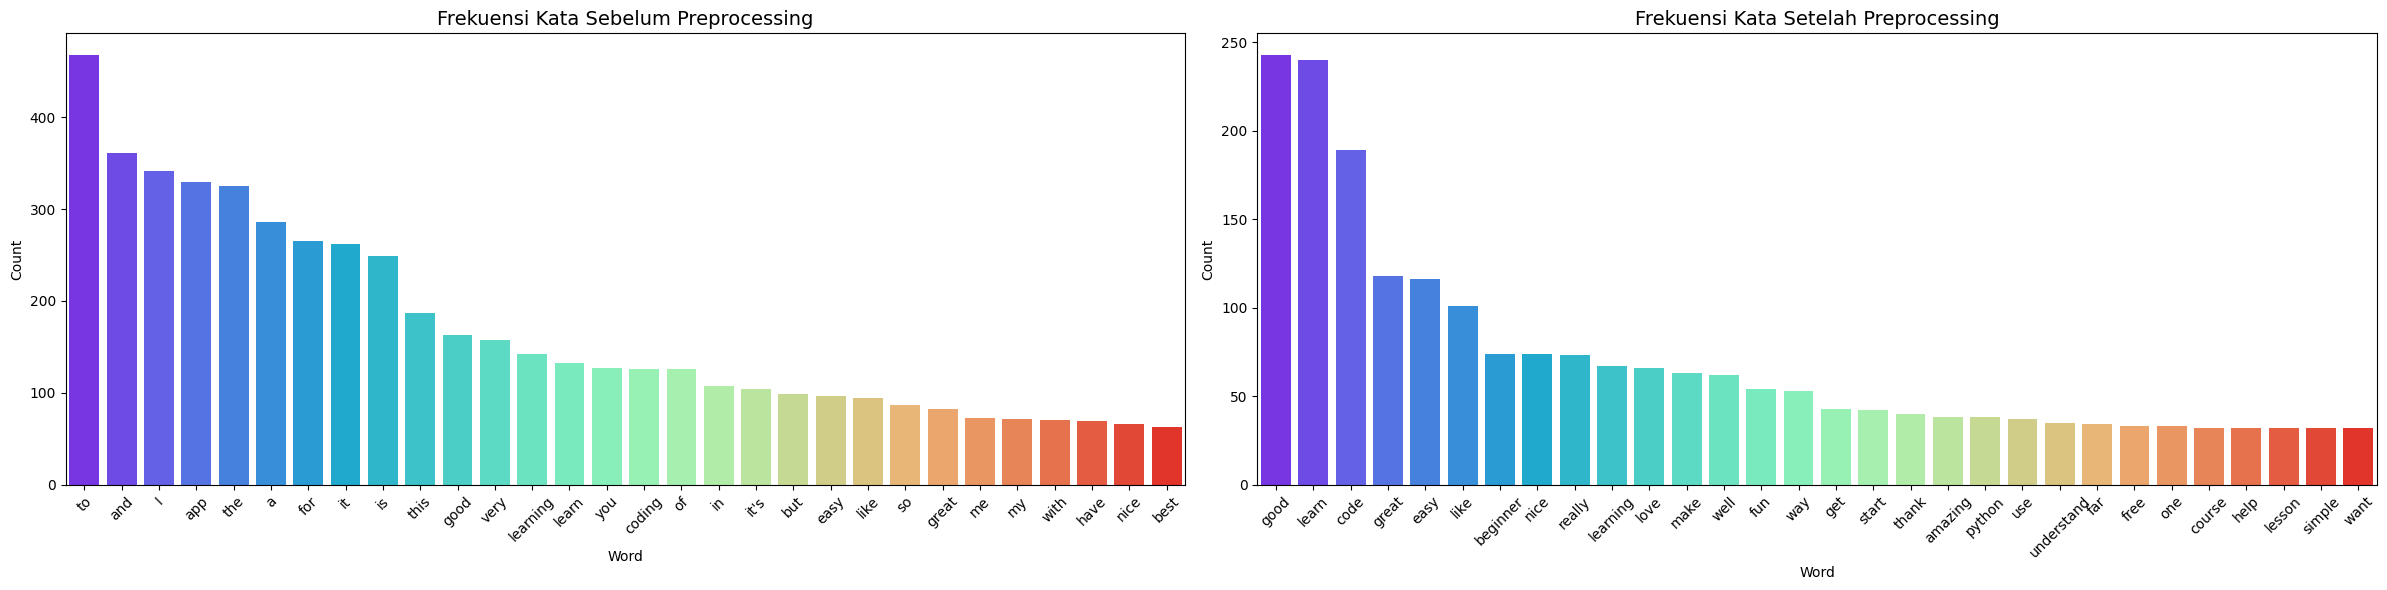

In [21]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [22]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [24]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,"[always, good]",always good
1,"[good, app., input, management, is, not, perfe...",good app. input management is not perfect sinc...
2,"[not, bad]",not bad
3,"[this, app, is, amazing, ,, it, really, helps]","this app is amazing , it really helps"
4,"[good, 😊]",good 😊


In [25]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [26]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [27]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,"[always, good]",always good,0.000,0.256,0.744,0.4404,positive
1,"[good, app., input, management, is, not, perfe...",good app. input management is not perfect sinc...,0.042,0.868,0.090,0.5370,positive
2,"[not, bad]",not bad,0.000,0.260,0.740,0.4310,positive
3,"[this, app, is, amazing, ,, it, really, helps]","this app is amazing , it really helps",0.000,0.428,0.572,0.7713,positive
4,"[good, 😊]",good 😊,0.000,0.000,1.000,0.4404,positive


In [28]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 862 review
- Neutral : 61 review
- Negative: 45 review


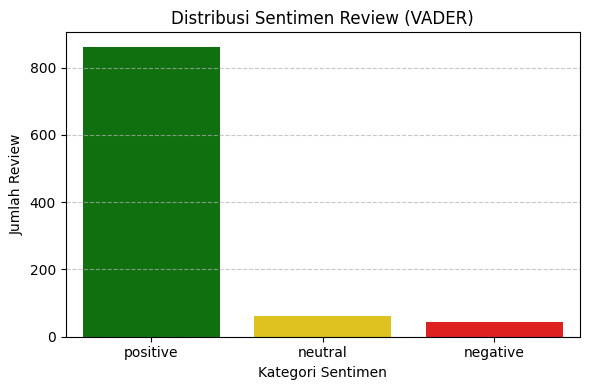

In [29]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [31]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                24        4        26
neutral                  3        5        29
positive                18       52       807


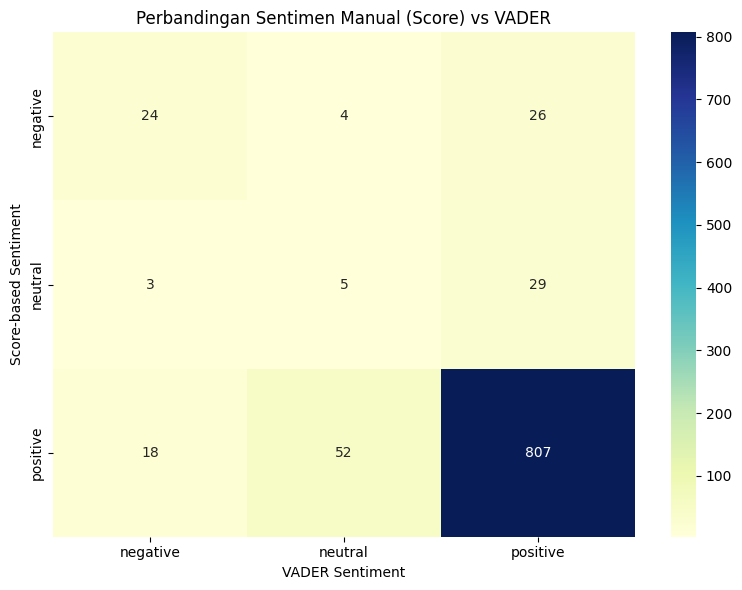

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [32]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 968
✅ Jumlah yang cocok    : 836
📊 Akurasi Kesesuaian   : 86.36%


### 6️⃣ **Topic Modelling**

In [78]:
def display_labeled_topics(model, feature_names, topic_labels=None, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        if topic_labels is not None:
            label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        else:
            label = f"Topik {topic_idx + 1}"
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))
        
# Fungsi untuk memproses dan tampilkan topik dari subset data
def topic_modeling_by_sentiment(df, label, topic_labels=None, n_topics=5, no_top_words=10):
    print(f"\n===== 🔍 Topik untuk Sentimen: {label.upper()} =====")

    df = df.copy()
    df['clean_text_final'] = df['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=2,
        ngram_range=(1, 2)
    )
    X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text_final'])

    nmf_model = NMF(n_components=n_topics, random_state=42)
    topic_distribution = nmf_model.fit_transform(X_tfidf)

    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels, no_top_words)

    # Tambahkan kolom dominan topik
    df['dominant_topic'] = topic_distribution.argmax(axis=1)
    df['dominant_topic_display'] = df['dominant_topic'] + 1  # 1-based

    return df



In [79]:
# Pisahkan dataset berdasarkan sentimen
df_modelling = df2[['tokens_clean_final', 'sentiment_rating']].copy()
sentiment_labels = ['positive', 'negative', 'neutral']  # Sesuaikan dengan label yang kamu pakai

In [80]:
# Jalankan topic modeling per kelompok sentimen
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]
    if not df_sentiment.empty:
        topic_modeling_by_sentiment(df_sentiment, label, n_topics=5, no_top_words=10)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1
🔑 Kata Kunci: good, good beginner, beginner, good learning, learning, really good, good learn, really, good code, far good

🧠 Topik 2
🔑 Kata Kunci: nice, nice learn, pay, helpful, really, app, quite, question, aap, quiz

🧠 Topik 3
🔑 Kata Kunci: great, great learning, great beginner, great learn, learning, tool, beginner, far, great tool, really great

🧠 Topik 4
🔑 Kata Kunci: learn, code, easy, learn code, easy learn, well, amazing, way, fun, like

🧠 Topik 5
🔑 Kata Kunci: love, good love, helpful, love learn, really love, duolingo, like duolingo, like, really, know

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1
🔑 Kata Kunci: code, html, run, even, run code, try, python, make, incorrect, sure

🧠 Topik 2
🔑 Kata Kunci: ask money, ask, money, recommend, course, tell, many, language, soon, also

🧠 Topik 3
🔑 Kata Kunci: good, want, interesting, well, ai, way, learn, please, fix, problem

🧠 Topik 4
🔑 Kata Kunci: start, sign, st

In [81]:
# Mapping topik ke label tematik
positive_topic_labels = {
    0: "Topik 1 - Pengalaman Belajar Positif bagi Pemula",
    1: "Topik 2 - Pembelajaran Menyenangkan & Interaktif",
    2: "Topik 3 - Apresiasi terhadap Tool dan Fitur Aplikasi",
    3: "Topik 4 - Kemudahan Belajar Koding yang Efektif",
    4: "Topik 5 - Kecintaan terhadap Mimo & Perbandingan dengan Duolingo"
}

negative_topic_labels = {
    0: "Topik 1 - Masalah Teknis saat Menjalankan Kode",
    1: "Topik 2 - Keluhan Monetisasi dan Permintaan Pembayaran",
    2: "Topik 3 - Kekecewaan atas Materi atau Fitur AI yang Kurang Maksimal",
    3: "Topik 4 - Kesulitan Akses Akun dan Masalah Login",
    4: "Topik 5 - Ketidakpuasan terhadap Model Berlangganan"
}

neutral_topic_labels = {
    0: "Topik 1 - Penilaian Umum tentang Pengalaman Belajar yang Layak",
    1: "Topik 2 - Ketersediaan Fitur dan Harapan pada Versi Gratis",
    2: "Topik 3 - Proses Belajar yang Ringan dan Menarik",
    3: "Topik 4 - Harapan Terhadap Proyek atau Fitur Tambahan",
    4: "Topik 5 - Aktivitas Harian dan Penggunaan Aplikasi Secara Rutin"
}

In [82]:
# Siapkan mapping topik per sentimen
sentiment_topic_mappings = {
    'positive': positive_topic_labels,
    'negative': negative_topic_labels,
    'neutral': neutral_topic_labels
}

# Inisialisasi DataFrame akhir
final_topic_df = pd.DataFrame()

# Jalankan topic modeling per sentimen dan gabungkan hasil
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label].copy()
    
    if not df_sentiment.empty:
        topic_labels = sentiment_topic_mappings.get(label)
        df_with_topics = topic_modeling_by_sentiment(df_sentiment, label, topic_labels=topic_labels, n_topics=5, no_top_words=10)
        
        # Tambahkan kolom label topik tematik
        df_with_topics['jenis_topik'] = df_with_topics['dominant_topic'].map(topic_labels)

        # Gabungkan ke tabel akhir
        final_topic_df = pd.concat([final_topic_df, df_with_topics], ignore_index=True)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pengalaman Belajar Positif bagi Pemula
🔑 Kata Kunci: good, good beginner, beginner, good learning, learning, really good, good learn, really, good code, far good

🧠 Topik 2 - Pembelajaran Menyenangkan & Interaktif
🔑 Kata Kunci: nice, nice learn, pay, helpful, really, app, quite, question, aap, quiz

🧠 Topik 3 - Apresiasi terhadap Tool dan Fitur Aplikasi
🔑 Kata Kunci: great, great learning, great beginner, great learn, learning, tool, beginner, far, great tool, really great

🧠 Topik 4 - Kemudahan Belajar Koding yang Efektif
🔑 Kata Kunci: learn, code, easy, learn code, easy learn, well, amazing, way, fun, like

🧠 Topik 5 - Kecintaan terhadap Mimo & Perbandingan dengan Duolingo
🔑 Kata Kunci: love, good love, helpful, love learn, really love, duolingo, like duolingo, like, really, know

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Masalah Teknis saat Menjalankan Kode
🔑 Kata Kunci: code, html, run, even, run code, try, 


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pengalaman Belajar Positif bagi Pemula
🔑 Kata Kunci: good, good beginner, beginner, good learning, learning, really good, good learn, really, good code, far good

🧠 Topik 2 - Pembelajaran Menyenangkan & Interaktif
🔑 Kata Kunci: nice, nice learn, pay, helpful, really, app, quite, question, aap, quiz

🧠 Topik 3 - Apresiasi terhadap Tool dan Fitur Aplikasi
🔑 Kata Kunci: great, great learning, great beginner, great learn, learning, tool, beginner, far, great tool, really great

🧠 Topik 4 - Kemudahan Belajar Koding yang Efektif
🔑 Kata Kunci: learn, code, easy, learn code, easy learn, well, amazing, way, fun, like

🧠 Topik 5 - Kecintaan terhadap Mimo & Perbandingan dengan Duolingo
🔑 Kata Kunci: love, good love, helpful, love learn, really love, duolingo, like duolingo, like, really, know


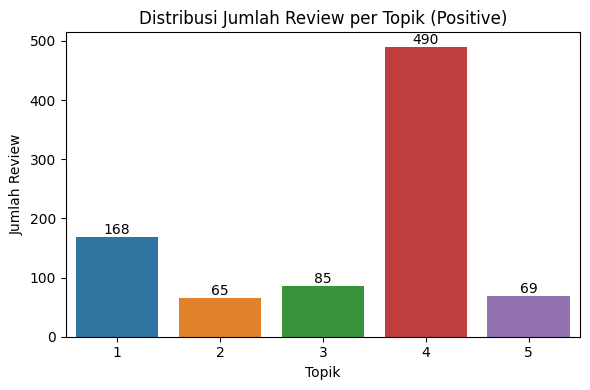

In [83]:
# Contoh: visualisasi untuk sentimen positif
label = 'positive'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=positive_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Masalah Teknis saat Menjalankan Kode
🔑 Kata Kunci: code, html, run, even, run code, try, python, make, incorrect, sure

🧠 Topik 2 - Keluhan Monetisasi dan Permintaan Pembayaran
🔑 Kata Kunci: ask money, ask, money, recommend, course, tell, many, language, soon, also

🧠 Topik 3 - Kekecewaan atas Materi atau Fitur AI yang Kurang Maksimal
🔑 Kata Kunci: good, want, interesting, well, ai, way, learn, please, fix, problem

🧠 Topik 4 - Kesulitan Akses Akun dan Masalah Login
🔑 Kata Kunci: start, sign, still, account, get, heart, issue, bad, really, review

🧠 Topik 5 - Ketidakpuasan terhadap Model Berlangganan
🔑 Kata Kunci: pay, use, subscription, one, would, like, free, version, feel, course


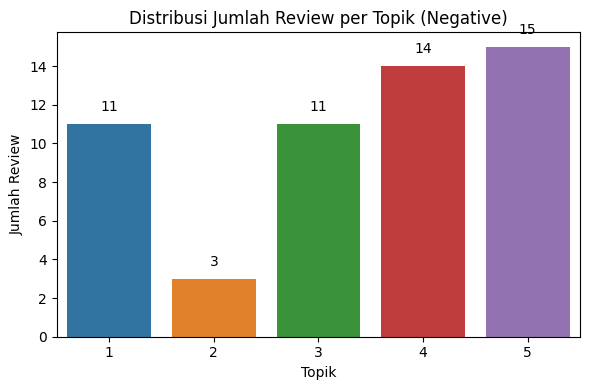

In [84]:
# Contoh: visualisasi untuk sentimen negative
label = 'negative'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=negative_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEUTRAL =====

🧠 Topik 1 - Penilaian Umum tentang Pengalaman Belajar yang Layak
🔑 Kata Kunci: good, pretty, also, please, web, beginner, think, learn, streak, learning

🧠 Topik 2 - Ketersediaan Fitur dan Harapan pada Versi Gratis
🔑 Kata Kunci: course, little, free, one, year, ever, button, complete, feature, possible

🧠 Topik 3 - Proses Belajar yang Ringan dan Menarik
🔑 Kata Kunci: easy, interesting, learn, code, like, lesson, also, come, possible, progress

🧠 Topik 4 - Harapan Terhadap Proyek atau Fitur Tambahan
🔑 Kata Kunci: pay, get, want, project, max, additional, start learn, learn, start, pretty

🧠 Topik 5 - Aktivitas Harian dan Penggunaan Aplikasi Secara Rutin
🔑 Kata Kunci: really, day, try, free, learning, heart, time, hour, like, come


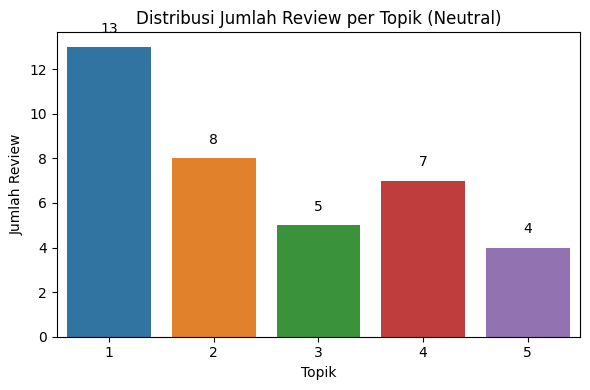

In [85]:
# Contoh: visualisasi untuk sentimen negative
label = 'neutral'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=neutral_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()

In [86]:
final_topic_df.head()

,tokens_clean_final,sentiment_rating,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[always, good]",positive,always good,0,1,Topik 1 - Pengalaman Belajar Positif bagi Pemula
1,"[amazing, really, help]",positive,amazing really help,3,4,Topik 4 - Kemudahan Belajar Koding yang Efektif
2,[good],positive,good,0,1,Topik 1 - Pengalaman Belajar Positif bagi Pemula
3,"[easy, learn, beginner, learn, really, love, m...",positive,easy learn beginner learn really love month la...,3,4,Topik 4 - Kemudahan Belajar Koding yang Efektif
4,"[help, lot]",positive,help lot,3,4,Topik 4 - Kemudahan Belajar Koding yang Efektif


### 7️⃣ **Penggabungan Data Hasil Review**

In [87]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    final_topic_df[['jenis_topik']].reset_index(drop=True)
], axis=1)

In [88]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik
0,always good,4,positive,positive,Topik 1 - Pengalaman Belajar Positif bagi Pemula
1,Good app. Input management is not perfect sinc...,3,neutral,positive,Topik 4 - Kemudahan Belajar Koding yang Efektif
2,Not bad,3,neutral,positive,Topik 1 - Pengalaman Belajar Positif bagi Pemula
3,"This app is amazing, it really helps",5,positive,positive,Topik 4 - Kemudahan Belajar Koding yang Efektif
4,good 😊,5,positive,positive,Topik 4 - Kemudahan Belajar Koding yang Efektif


In [89]:
output_path = "../data/review_final_mimo.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_mimo.xlsx
